#PArte 1


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [63]:
# Substitua 'caminho_para_sua_planilha.csv' pelo caminho real do seu arquivo
df = pd.read_excel('/content/drive/MyDrive/trabalho estatística/Dados.xlsx')


# Visualizar as primeiras linhas do DataFrame
print(df.head())


   cod_micro             nome_micro  emprego2000  emprego2010  renda2000  \
0      11001       Porto Velho (RO)       146736       238960     700.89   
1      11002     Guajará-Mirim (RO)        19940        26231     531.14   
2      11003         Ariquemes (RO)        48630        72008     587.29   
3      11004         Ji-Paraná (RO)       106410       121458     540.79   
4      11005  Alvorada D'Oeste (RO)        23160        25998     428.24   

   renda2010  
0    1535.09  
1     968.71  
2    1111.23  
3    1138.42  
4     969.38  


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Substitua 'caminho_para_sua_planilha.csv' pelo caminho real do seu arquivo
#df = pd.read_excel('/content/Dados.xlsx')


# Visualizar as primeiras linhas do DataFrame
#print(df.head())


   cod_micro             nome_micro  emprego2000  emprego2010  renda2000  \
0      11001       Porto Velho (RO)       146736       238960     700.89   
1      11002     Guajará-Mirim (RO)        19940        26231     531.14   
2      11003         Ariquemes (RO)        48630        72008     587.29   
3      11004         Ji-Paraná (RO)       106410       121458     540.79   
4      11005  Alvorada D'Oeste (RO)        23160        25998     428.24   

   renda2010  
0    1535.09  
1     968.71  
2    1111.23  
3    1138.42  
4     969.38  


In [ ]:
# Informações gerais sobre o DataFrame
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Verificar valores ausentes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_micro    558 non-null    int64  
 1   nome_micro   558 non-null    object 
 2   emprego2000  558 non-null    int64  
 3   emprego2010  558 non-null    int64  
 4   renda2000    558 non-null    float64
 5   renda2010    558 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 26.3+ KB
None
          cod_micro   emprego2000   emprego2010    renda2000    renda2010
count    558.000000  5.580000e+02  5.580000e+02   558.000000   558.000000
mean   31319.586022  1.086350e+05  1.445484e+05   445.098315   972.567599
std    10396.659812  3.167529e+05  4.112704e+05   179.485313   319.260064
min    11001.000000  1.109000e+03  1.605000e+03   129.600000   431.320000
25%    24007.250000  2.695350e+04  3.467450e+04   281.510000   682.010000
50%    31027.500000  5.130500e+04  6.514650e+04 

In [64]:
#Prints every numerical value less than 0 in the dataframe,
for column in df.columns:
    if df[column].dtype in [int, float]:
        zero_or_less = df[df[column] <= 0][column]

zero_or_less

,renda2010


In [65]:
# Calcular o logaritmo natural de 'emprego2000' e 'renda2000'
df['log_emprego2000'] = np.log(df['emprego2000'])
df["log_emprego2010"] = np.log(df["emprego2010"])
df['log_renda2000'] = np.log(df['renda2000'])
df["log_renda2010"] = np.log(df["renda2010"])
df


,cod_micro,nome_micro,emprego2000,emprego2010,renda2000,renda2010,log_emprego2000,log_emprego2010,log_renda2000,log_renda2010
0,11001,Porto Velho (RO),146736,238960,700.89,1535.09,11.896390,12.384051,6.552351,7.336344
1,11002,Guajará-Mirim (RO),19940,26231,531.14,968.71,9.900483,10.174697,6.275026,6.875965
2,11003,Ariquemes (RO),48630,72008,587.29,1111.23,10.791996,11.184533,6.375519,7.013223
3,11004,Ji-Paraná (RO),106410,121458,540.79,1138.42,11.575055,11.707324,6.293031,7.037397
4,11005,Alvorada D'Oeste (RO),23160,25998,428.24,969.38,10.050182,10.165775,6.059684,6.876657
...,...,...,...,...,...,...,...,...,...,...
553,52015,Meia Ponte (GO),133680,173988,593.11,1181.30,11.803204,12.066742,6.385380,7.074371
554,52016,Pires do Rio (GO),34428,44312,566.06,1117.89,10.446625,10.699011,6.338700,7.019198
555,52017,Catalão (GO),49738,71473,499.05,1358.20,10.814525,11.177075,6.212706,7.213916
556,52018,Quirinópolis (GO),38891,55106,515.58,1335.89,10.568518,10.917014,6.245292,7.197353


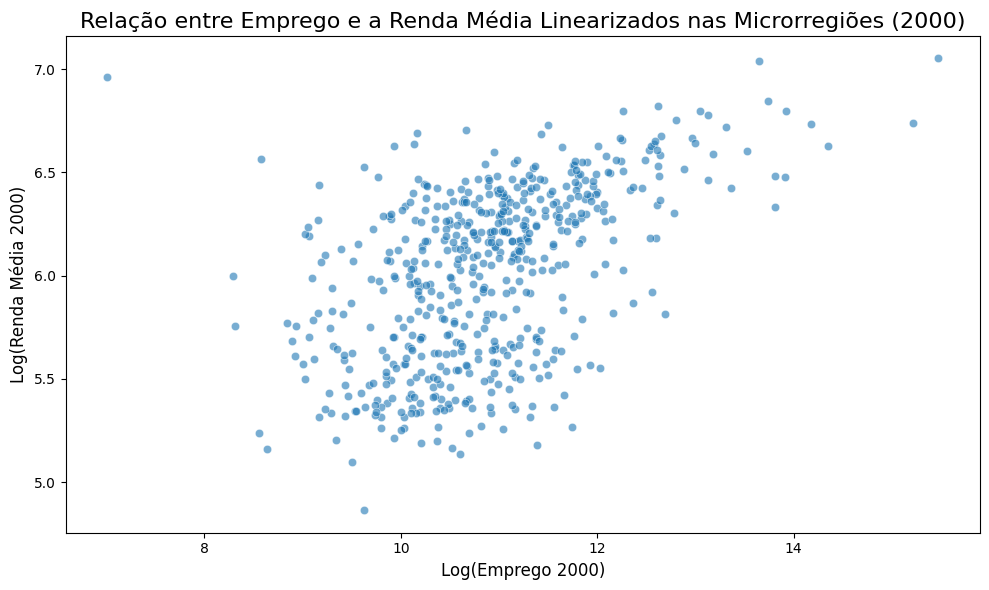

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
plt.xlabel('Log(Emprego 2000)', fontsize=12)
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


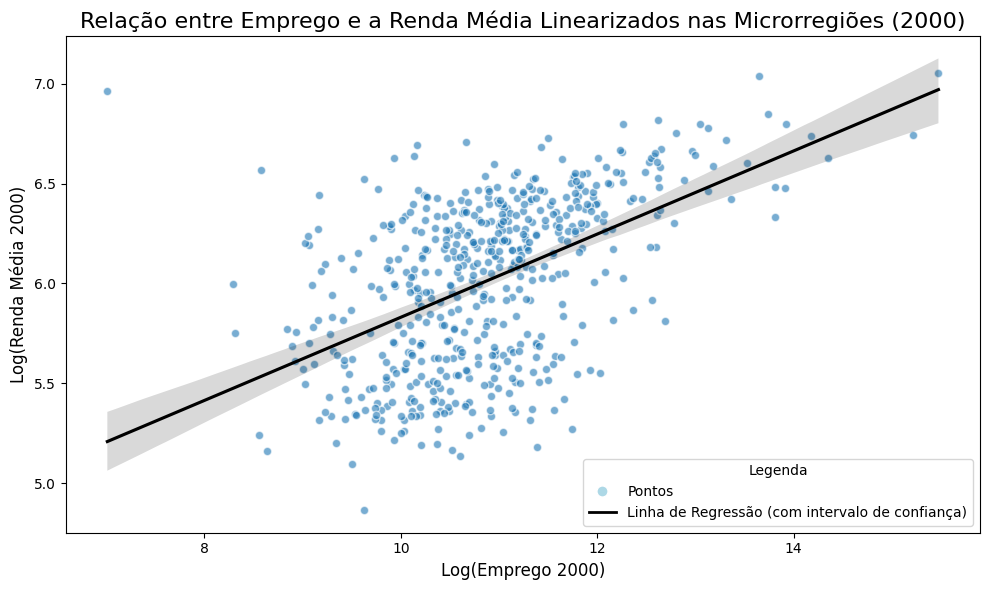

In [ ]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter_kws={'alpha':0.6, 'edgecolor':'w'}, line_kws={'color':'black'})
#sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter_kws={'alpha':0.6, 'edgecolor':'w'}, line_kws={'color':'black'}, ci=None )
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2000)', fontsize=12)
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


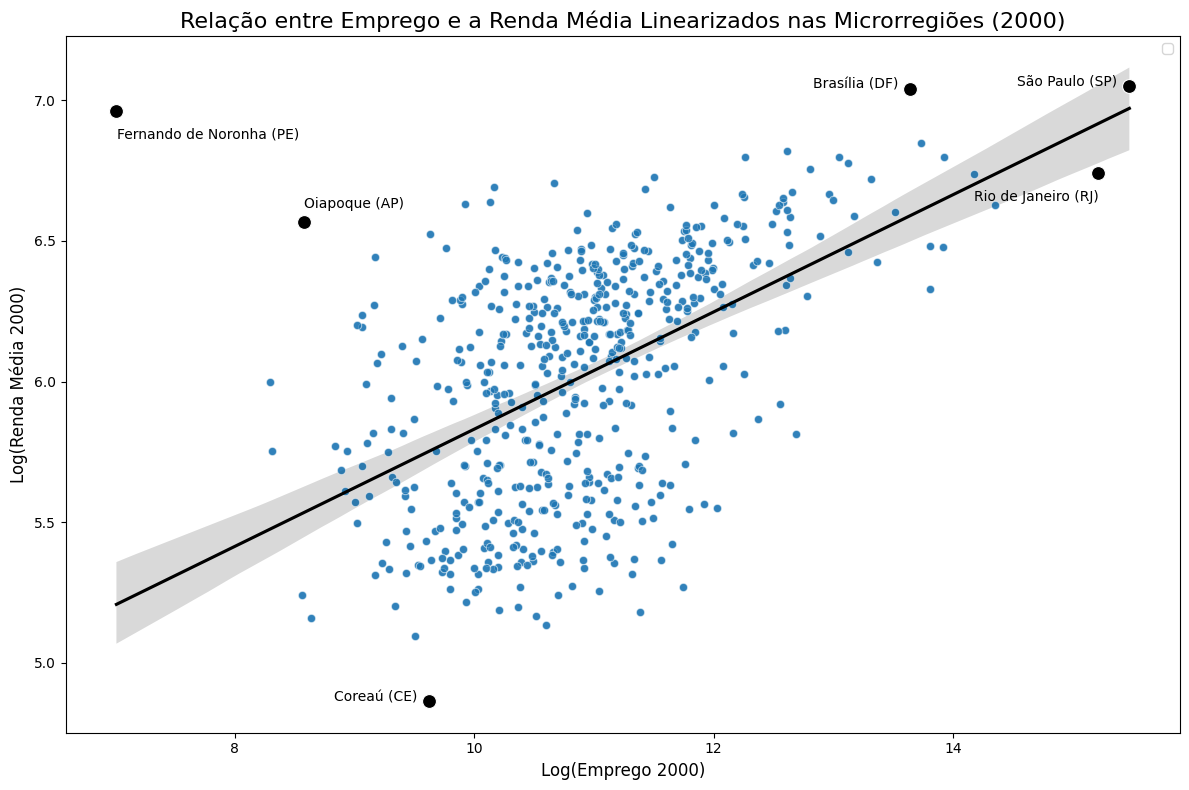

In [70]:
plt.figure(figsize=(12, 8))

# Lista de cidades para destacar
cidades_destacadas = [
    "Brasília (DF)", "Rio de Janeiro (RJ)", "São Paulo (SP)",
    "Fernando de Noronha (PE)", "Coreaú (CE)", "Oiapoque (AP)"
]

#Trendline:

sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter_kws={'alpha':0.8, 'edgecolor':'w'}, line_kws={'color':'black'})

# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = 0.00, -0.1  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima


    plt.text(
        row['log_emprego2000'] + x_offset,
        row['log_renda2000'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Configurações do gráfico
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
plt.xlabel('Log(Emprego 2000)', fontsize=12)
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


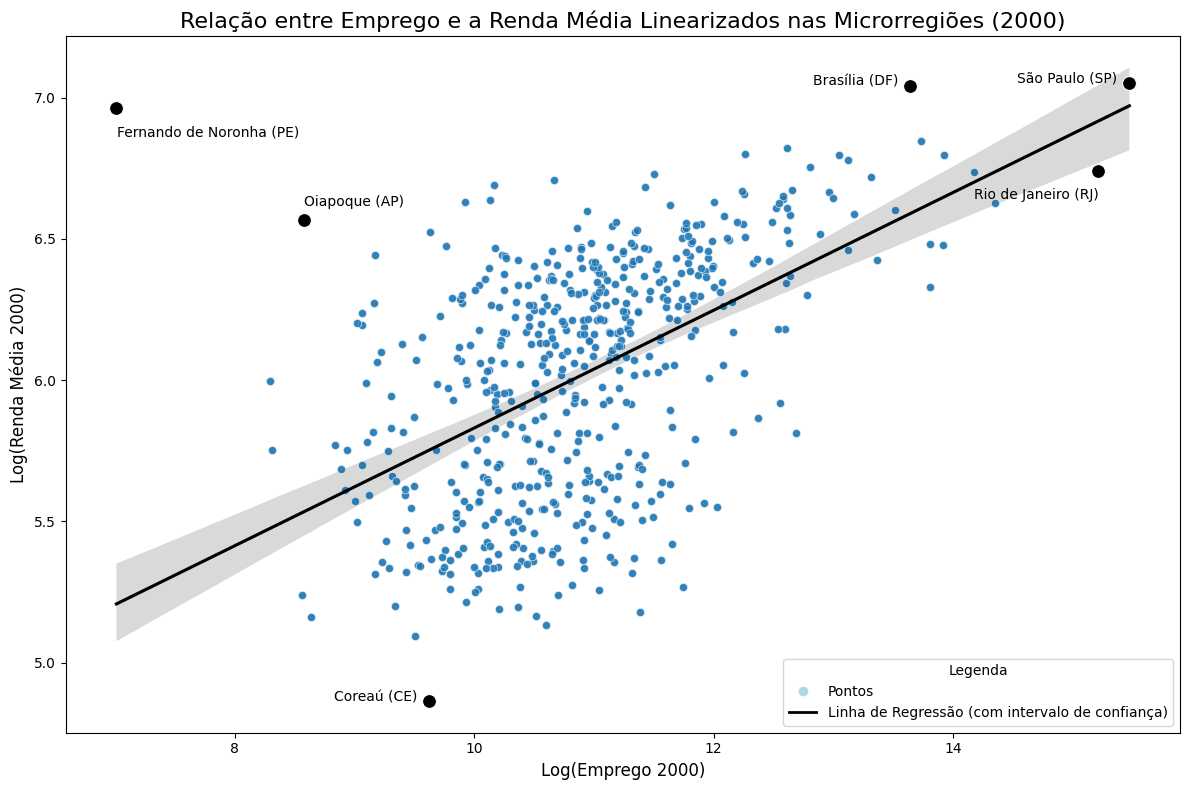

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))

# Lista de cidades para destacar
cidades_destacadas = [
    "Brasília (DF)", "Rio de Janeiro (RJ)", "São Paulo (SP)",
    "Fernando de Noronha (PE)", "Coreaú (CE)", "Oiapoque (AP)"
]

# Trendline
sns.regplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df,
    scatter_kws={'alpha': 0.8, 'edgecolor': 'w'},
    line_kws={'color': 'black'}
)





# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)

# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = 0.00, -0.1  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima

    plt.text(
        row['log_emprego2000'] + x_offset,
        row['log_renda2000'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Adicionar legenda personalizada
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')

# Configurações do gráfico
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
plt.xlabel('Log(Emprego 2000)', fontsize=12)
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
#testamos outras regressões

## Polinomial

# Spline

## SVR

#rede neural

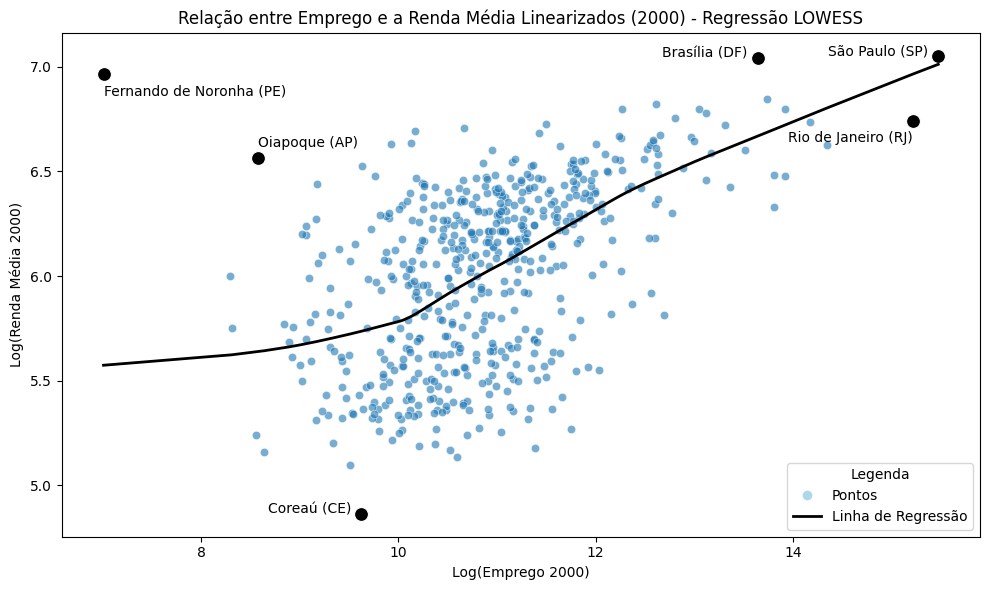

In [73]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2000) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = 0.00, -0.1  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima

    plt.text(
        row['log_emprego2000'] + x_offset,
        row['log_renda2000'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )
# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)


plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Log(Renda Média 2000)')
plt.grid(False)
plt.tight_layout()
plt.show()


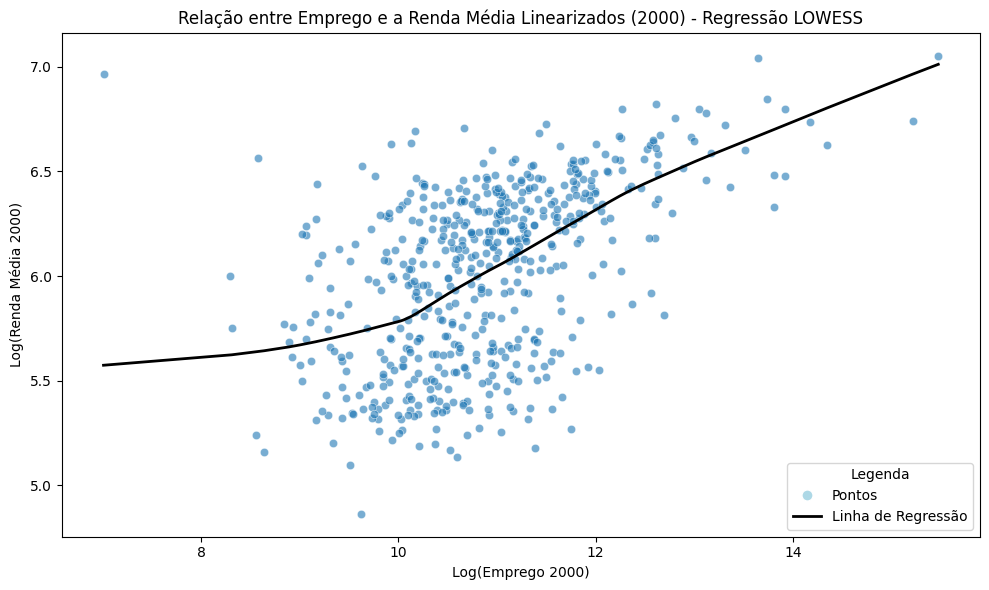

In [89]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2000) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df,
    alpha=0.6,
    edgecolor='w',
)




plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Log(Renda Média 2000)')
plt.grid(False)
plt.tight_layout()
plt.show()


p/ o ano 2010

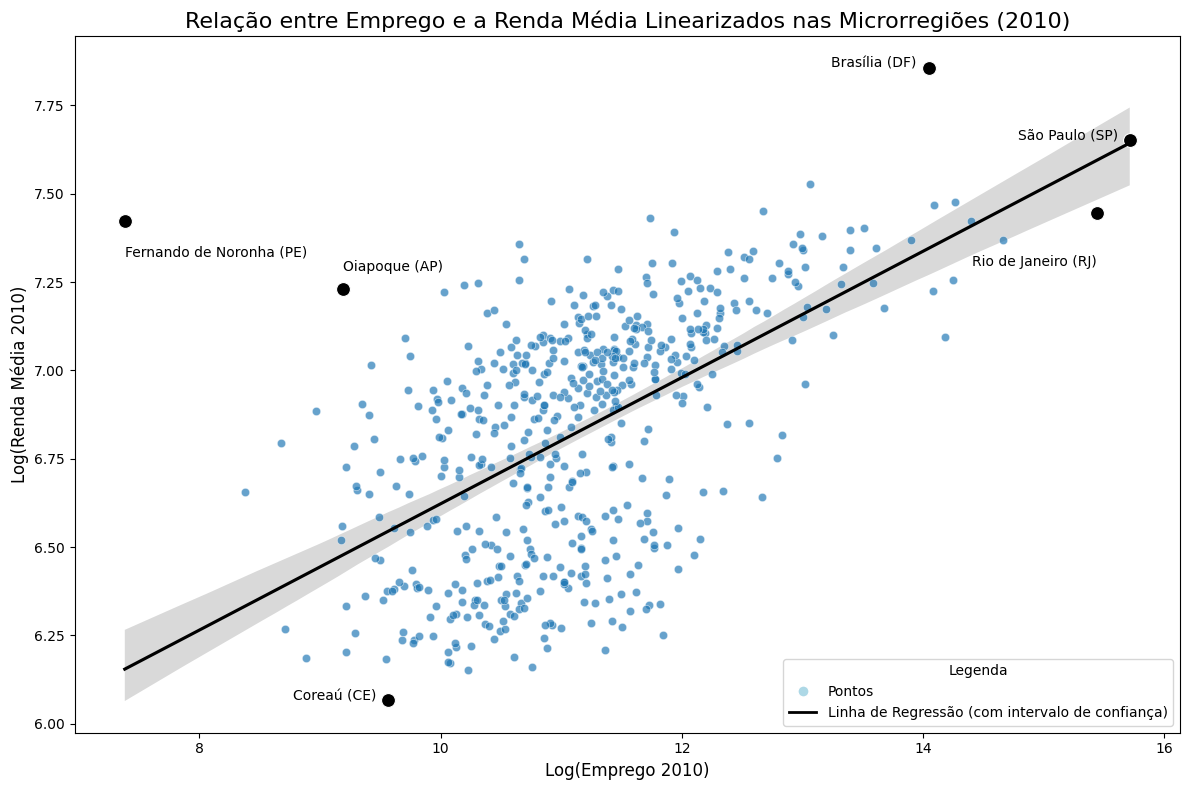

In [84]:
plt.figure(figsize=(12, 8))



# Trendline
sns.regplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df,
    scatter_kws={'alpha': 0.2, 'edgecolor': 'w'},
    line_kws={'color': 'black'}
)





# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)

# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = -0.001, -0.15  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima

    plt.text(
        row['log_emprego2010'] + x_offset,
        row['log_renda2010'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Adicionar legenda personalizada
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')

# Configurações do gráfico
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2010)', fontsize=16)
plt.xlabel('Log(Emprego 2010)', fontsize=12)
plt.ylabel('Log(Renda Média 2010)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


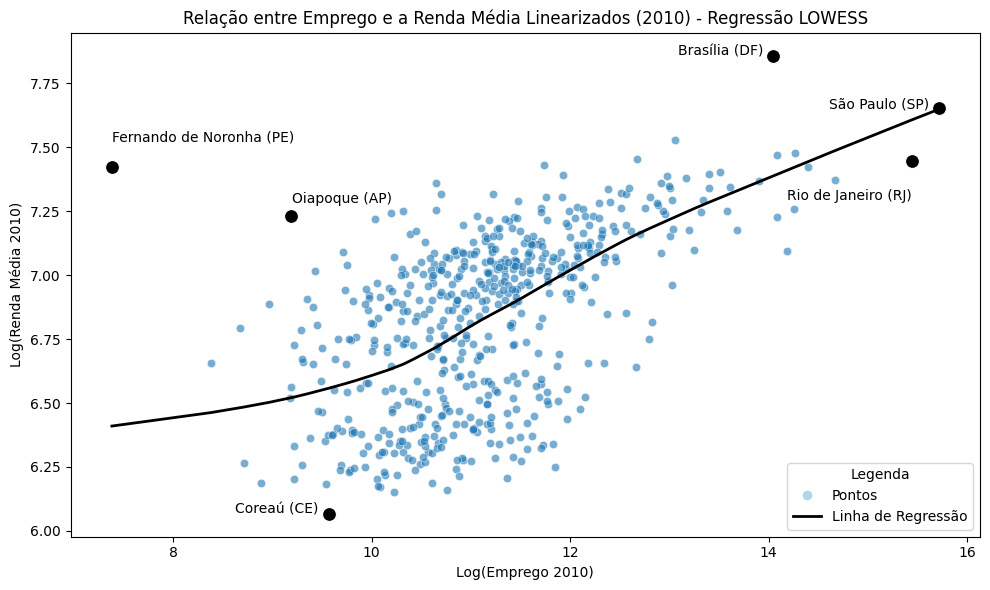

In [92]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2010', y='log_renda2010', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2010) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, 0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = -0.001, -0.15  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima

    plt.text(
        row['log_emprego2010'] + x_offset,
        row['log_renda2010'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)


plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2010)')
plt.ylabel('Log(Renda Média 2010)')
plt.grid(False)
plt.tight_layout()
plt.show()

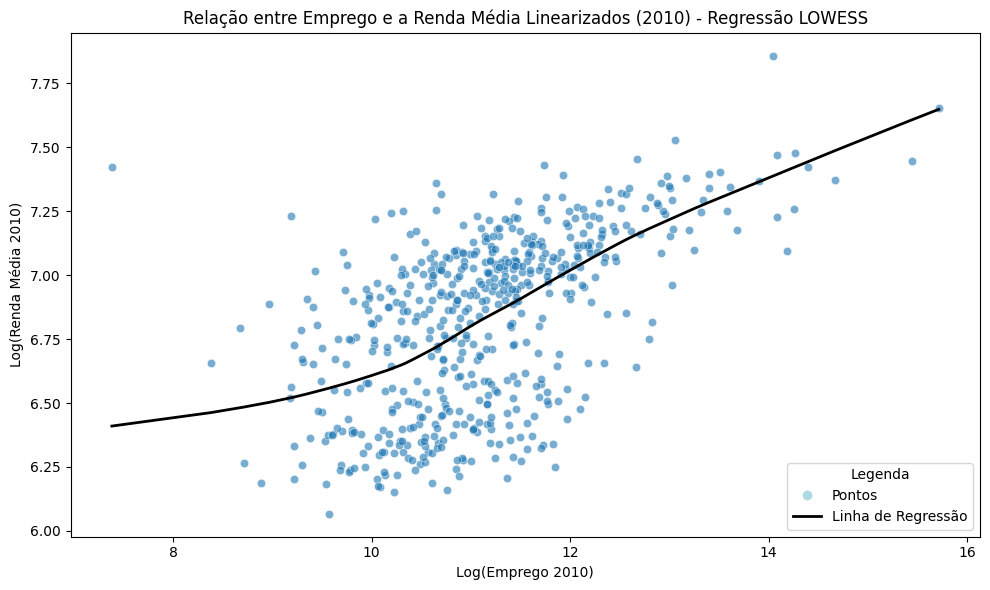

In [95]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2010', y='log_renda2010', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2010) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df,  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)




plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2010)')
plt.ylabel('Log(Renda Média 2010)')
plt.grid(False)
plt.tight_layout()
plt.show()

# Plotly

In [ ]:
!pip install plotly pandas
!pip install plotly pandas statsmodels


In [101]:
import pandas as pd
import numpy as np
import plotly.express as px


In [116]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [117]:
# Ajustar o modelo LWOESS
lowess = sm.nonparametric.lowess
# frac controla o grau de suavização. Ajuste conforme necessário (ex: 0.3)
z = lowess(df['log_renda2000'], df['log_emprego2000'], frac=0.6)

# Convertendo o resultado para um DataFrame para facilitar a manipulação
lowess_df = pd.DataFrame(z, columns=['log_emprego2000', 'log_renda2000'])

# Criar a regressão linear
model = LinearRegression()
model.fit(df[['log_emprego2000']], df['log_renda2000'])
df['linear_trend'] = model.predict(df[['log_emprego2000']])

# Função para formatar números com espaços a cada três dígitos
def format_number(x):
    return f"{int(x):,}".replace(",", " ")

# Aplicar a função nas colunas 'emprego2000' e 'renda2000'
df['formatted_emprego2000'] = df['emprego2000'].apply(format_number)
df['formatted_renda2000'] = df['renda2000'].apply(format_number)
df['formatted_emprego2010'] = df['emprego2010'].apply(format_number)
df['formatted_renda2010'] = df['renda2010'].apply(format_number)

# Verificar as novas colunas formatadas
print(df[['emprego2010', 'formatted_emprego2010', 'renda2010', 'formatted_renda2010']].head())

In [169]:
# Criar o scatterplot interativo
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['log_renda2000'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(31, 119, 180, 0.3)',  # Cor azul com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],  # Exibe o nome da microrregião no hover
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Renda 2000: %{customdata[1]}<br>' +
            'Log(Emprego 2000): %{x:.2f}<br>' +
            'Log(Renda Média 2000): %{y:.2f}<br>' +
            '<extra></extra>'  # Remove a informação adicional padrão
        ),
        customdata=np.stack((df['formatted_emprego2000'], df['formatted_renda2000']), axis=-1),
        name='Cidades'
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df['log_emprego2000'],
        y=lowess_df['log_renda2000'],
        mode='lines',
        name='Regressão LOWES',
        line=dict(color='black', width=5),
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['linear_trend'],
        mode='lines',
        name='Regressão Linear',
        line=dict(color='#8B0000', width=5),
        hoverinfo='skip'
    )
)


# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)',
    xaxis_title='Log(Emprego 2000)',
    yaxis_title='Log(Renda Média 2000)',
    template='plotly_white',
    showlegend=True,  # Remove a legenda
    hovermode='closest',
    #width=1200,  # Ajusta a largura do gráfico (reduzido)
    #height=600  # Mantém uma altura equilibrada
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
      title='Linhas de Tendência',
      itemsizing='constant'
    ),
    annotations=[
        dict(
            x=1.03,  # Posição no eixo X (proporcional ao tamanho do gráfico)
            y=0,  # Posição no eixo Y (proporcional ao tamanho do gráfico)
            xref='paper',
            yref='paper',
            text='Clique na legenda para remover elementos.<br><br> <br> Pontos muito próximos? <br>Dê zoom selecionando uma área e clique duplo para resetar.',
            showarrow=False,
            font=dict(size=15, color='gray'),
            align='right'
        )
    ]
)
# Exibir o gráfico
fig.show()


In [170]:
fig.write_html('grafico_interativo.html')


In [99]:
# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)',
    xaxis_title='Log(Emprego 2000)',
    yaxis_title='Log(Renda Média 2000)',
    template='plotly_white',
    showlegend=True,  # Remove a legenda
    hovermode='closest',
    width=1200,  # Ajusta a largura do gráfico (reduzido)
    #height=600  # Mantém uma altura equilibrada
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
      title='Linhas de Tendência',
      itemsizing='constant'
    ),
    annotations=[
        dict(
            x=1.15,  # Posição no eixo X (proporcional ao tamanho do gráfico)
            y=0,  # Posição no eixo Y (proporcional ao tamanho do gráfico)
            xref='paper',
            yref='paper',
            text='Clique na legenda para remover elementos.<br><br> <br> Pontos muito próximos? <br>Dê zoom selecionando uma área e clique duplo para resetar.',
            showarrow=False,
            font=dict(size=15, color='gray'),
            align='right'
        )
    ]
)

   emprego2010 formatted_emprego2010  renda2010 formatted_renda2010
0       238960               238 960    1535.09               1 535
1        26231                26 231     968.71                 968
2        72008                72 008    1111.23               1 111
3       121458               121 458    1138.42               1 138
4        25998                25 998     969.38                 969


In [105]:
# Criar o scatterplot interativo
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['log_renda2000'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(31, 119, 180, 0.6)',  # Cor azul com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Renda 2000: %{customdata[1]}<br>' +
            'Log(Emprego 2000): %{x:.2f}<br>' +
            'Log(Renda Média 2000): %{y:.2f}<br>' +
            '<extra></extra>'  # Remove a informação adicional padrão
        ),
        customdata=np.stack((df['formatted_emprego2000'], df['formatted_renda2000']), axis=-1)
    )
)

# Adicionar a linha de tendência LOESS
fig.add_trace(
    go.Scatter(
        x=lowess_df['log_emprego2000'],
        y=lowess_df['log_renda2000'],
        mode='lines',
        name='LOESS Trendline',
        line=dict(color='black', width=2),
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)',
    xaxis_title='Log(Emprego 2000)',
    yaxis_title='Log(Renda Média 2000)',
    template='plotly_white',
    showlegend=False,  # Remove a legenda
    hovermode='closest'
)



# Exibir o gráfico
fig.show()


In [ ]:

# talvez clusterizar em 3 pontosx ( +-+ meio, fernando de noronha, acima de 12,5) talve de uma vizualização legal

In [ ]:
print(df.columns)

Index(['cod_micro', 'nome_micro', 'emprego2000', 'emprego2010', 'renda2000',
       'renda2010', 'log_emprego2000', 'log_emprego2010', 'log_renda2000',
       'log_renda2010', 'formatted_emprego2000', 'formatted_renda2000',
       'formatted_emprego2010', 'formatted_renda2010'],
      dtype='object')


## 2010

In [ ]:
df

,cod_micro,nome_micro,emprego2000,emprego2010,renda2000,renda2010,log_emprego2000,log_emprego2010,log_renda2000,log_renda2010,formatted_emprego2000,formatted_renda2000,formatted_emprego2010,formatted_renda2010
0,11001,Porto Velho (RO),146736,238960,700.89,1535.09,11.896390,12.384051,6.552351,7.336344,146 736,700,238 960,1 535
1,11002,Guajará-Mirim (RO),19940,26231,531.14,968.71,9.900483,10.174697,6.275026,6.875965,19 940,531,26 231,968
2,11003,Ariquemes (RO),48630,72008,587.29,1111.23,10.791996,11.184533,6.375519,7.013223,48 630,587,72 008,1 111
3,11004,Ji-Paraná (RO),106410,121458,540.79,1138.42,11.575055,11.707324,6.293031,7.037397,106 410,540,121 458,1 138
4,11005,Alvorada D'Oeste (RO),23160,25998,428.24,969.38,10.050182,10.165775,6.059684,6.876657,23 160,428,25 998,969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,52015,Meia Ponte (GO),133680,173988,593.11,1181.30,11.803204,12.066742,6.385380,7.074371,133 680,593,173 988,1 181
554,52016,Pires do Rio (GO),34428,44312,566.06,1117.89,10.446625,10.699011,6.338700,7.019198,34 428,566,44 312,1 117
555,52017,Catalão (GO),49738,71473,499.05,1358.20,10.814525,11.177075,6.212706,7.213916,49 738,499,71 473,1 358
556,52018,Quirinópolis (GO),38891,55106,515.58,1335.89,10.568518,10.917014,6.245292,7.197353,38 891,515,55 106,1 335


In [96]:
# Criar o scatterplot interativo
fig = go.Figure()

# Ajustar o modelo LOESS
lowess = sm.nonparametric.lowess
# frac controla o grau de suavização. Ajuste conforme necessário (ex: 0.3)
z = lowess(df['log_renda2010'], df['log_emprego2010'], frac=0.6)

# Convertendo o resultado para um DataFrame para facilitar a manipulação
lowess_df = pd.DataFrame(z, columns=['log_emprego2010', 'log_renda2010'])

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2010'],
        y=df['log_renda2010'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(31, 119, 180, 0.6)',  # Cor azul com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2010: %{customdata[0]}<br>' +
            'Renda 2010: %{customdata[1]}<br>' +
            'Log(Emprego 2010): %{x:.2f}<br>' +
            'Log(Renda Média 2010): %{y:.2f}<br>' +
            '<extra></extra>'  # Remove a informação adicional padrão
        ),
        customdata=np.stack((df['formatted_emprego2010'], df['formatted_renda2010']), axis=-1)
    )
)

# Adicionar a linha de tendência LOESS
fig.add_trace(
    go.Scatter(
        x=lowess_df['log_emprego2010'],
        y=lowess_df['log_renda2010'],
        mode='lines',
        name='LOESS Trendline',
        line=dict(color='black', width=2),
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Log(Emprego) e Log(Renda Média) nas Microrregiões (2010)',
    xaxis_title='Log(Emprego 2010)',
    yaxis_title='Log(Renda Média 2010)',
    template='plotly_white',
    showlegend=False,  # Remove a legenda
    hovermode='closest'
)



# Exibir o gráfico
fig.show()


KeyError: 'formatted_emprego2010'

Os dois gráficos estão muito parecidos, com um leve aumento de nível (maior população, mais renda em geral) e uma aparente maior proximidade da linha de tendência e a população

#Questão 3

In [ ]:
import pandas as pd

# Calculando a correlação para o ano 2000
correlacao_2000 = df['log_emprego2000'].corr(df['log_renda2000'])

# Calculando a correlação para o ano 2010
correlacao_2010 = df['log_emprego2010'].corr(df['log_renda2010'])

# Exibindo os resultados
print(f"Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2000: {correlacao_2000:.2f}")
print(f"Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2010: {correlacao_2010:.2f}")


Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2000: 0.51
Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2010: 0.56


Interpretação:

Ano 2000:
Valor: 0.51
Interpretação: Existe uma correlação forte positiva entre o logaritmo do emprego e o logaritmo da renda média nas microrregiões em 2000. Isso indica que microrregiões com um maior número de empregos tendem a apresentar rendas médias mais elevadas.

Ano 2010:
Valor: 0.55
Interpretação: A correlação forte positiva aumentou ligeiramente para 0.56 em 2010. Isso sugere que, ao longo da década, a relação entre o tamanho do mercado de trabalho e a renda média se intensificou nas microrregiões analisadas.

Os resultados indicam que há uma relação positiva e robusta entre o tamanho do mercado de trabalho (emprego) e a renda média nas microrregiões tanto em 2000 quanto em 2010. A elevação do coeficiente de correlação de 0.51 para 0.56 demonstra um aumento das forças de aglomeração, e comprava que os dados se aproximaram da trendline no segundo gráfico

# Questão 4

In [ ]:
import pandas as pd
import numpy as np

# Supondo que o DataFrame 'df' já está carregado e possui as colunas necessárias

# Criar as colunas de diferença para log_emprego e log_renda
df['diff_log_emprego'] = df['log_emprego2010'] - df['log_emprego2000']
df['diff_log_renda'] = df['log_renda2010'] - df['log_renda2000']

# Verificar as novas colunas
print(df[['log_emprego2000', 'log_emprego2010', 'diff_log_emprego',
          'log_renda2000', 'log_renda2010', 'diff_log_renda']].head())


   log_emprego2000  log_emprego2010  diff_log_emprego  log_renda2000  \
0        11.896390        12.384051          0.487661       6.552351   
1         9.900483        10.174697          0.274214       6.275026   
2        10.791996        11.184533          0.392537       6.375519   
3        11.575055        11.707324          0.132269       6.293031   
4        10.050182        10.165775          0.115593       6.059684   

   log_renda2010  diff_log_renda  
0       7.336344        0.783993  
1       6.875965        0.600940  
2       7.013223        0.637704  
3       7.037397        0.744366  
4       6.876657        0.816973  


In [ ]:
import plotly.graph_objects as go
import statsmodels.api as sm

# Ajustar o modelo LOESS para as diferenças
lowess = sm.nonparametric.lowess
z = lowess(df['diff_log_renda'], df['diff_log_emprego'], frac=0.3)
lowess_df = pd.DataFrame(z, columns=['diff_log_emprego', 'diff_log_renda'])

# Criar o scatterplot interativo
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['diff_log_emprego'],
        y=df['diff_log_renda'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(31, 119, 180, 0.6)',  # Cor azul com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Emprego 2010: %{customdata[1]}<br>' +
            'Renda 2000: %{customdata[2]}<br>' +
            'Renda 2010: %{customdata[3]}<br>' +
            'Diferença Log(Emprego): %{x:.2f}<br>' +
            'Diferença Log(Renda): %{y:.2f}<br>' +
            '<extra></extra>'  # Remove a informação adicional padrão
        ),
        customdata=np.stack((df['formatted_emprego2000'],
                             df['formatted_emprego2010'],
                             df['formatted_renda2000'],
                             df['formatted_renda2010']), axis=-1)
    )
)

# Adicionar a linha de tendência LOESS
fig.add_trace(
    go.Scatter(
        x=lowess_df['diff_log_emprego'],
        y=lowess_df['diff_log_renda'],
        mode='lines',
        name='LOWESS Trendline',
        line=dict(color='red', width=2),
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Diferenças dos Logaritmos de Emprego e Renda (2010 - 2000)',
    xaxis_title='Diferença Log(Emprego 2010 - Emprego 2000)',
    yaxis_title='Diferença Log(Renda Média 2010 - Renda Média 2000)',
    template='plotly_white',
    showlegend=False,  # Remove a legenda
    hovermode='closest'
)

# Exibir o gráfico
fig.show()


In [ ]:
# Calcular a correlação entre as diferenças
correlacao_diferencas = df['diff_log_emprego'].corr(df['diff_log_renda'])

# Exibir o resultado
print(f"Coeficiente de Correlação entre Diferença Log(Emprego) e Diferença Log(Renda): {correlacao_diferencas:.2f}")


Coeficiente de Correlação entre Diferença Log(Emprego) e Diferença Log(Renda): -0.31


vou só deixar a mega interpretação do gpt pra arrumar dps:

In [ ]:
Interpretação do Coeficiente de Correlação de -0.31
1. Entendendo as Diferenças Calculadas
Antes de interpretar o coeficiente de correlação, é crucial compreender o que as diferenças representam:

diff_log_emprego = log_emprego2010 - log_emprego2000
Representa a mudança proporcional no número de empregos de 2000 para 2010.
diff_log_renda = log_renda2010 - log_renda2000
Representa a mudança proporcional na renda média das pessoas empregadas de 2000 para 2010.
2. Significado da Correlação Negativa
Um coeficiente de correlação de -0.31 indica uma correlação negativa moderada entre as variações dos logaritmos de emprego e renda média. Isso significa que, em geral, microrregiões que aumentaram significativamente seu número de empregos ao longo da década tenderam a diminuir sua renda média, e vice-versa.

3. Possíveis Explicações para a Correlação Negativa
a. Saturação do Mercado de Trabalho
Microrregiões com Alta Taxa de Emprego Inicial:
Regiões que já possuíam um elevado número de empregos em 2000 podem ter enfrentado limitações para crescimento adicional, resultando em aumentos mais modestos de emprego ou até mesmo em reduções devido a fatores como automação, mudanças econômicas ou desindustrialização.
Impacto na Renda Média:
Nessas regiões saturadas, aumento limitado de empregos pode não se traduzir proporcionalmente em aumentos de renda média. Além disso, se os novos empregos forem de menor remuneração ou menos qualificados, isso pode contribuir para estagnação ou diminuição da renda média.
b. Regiões em Desenvolvimento com Potencial de Crescimento
Microrregiões com Baixa Taxa de Emprego Inicial:
Regiões com menor número de empregos em 2000 podem ter experimentado um crescimento rápido no emprego entre 2000 e 2010, aproveitando novas oportunidades econômicas, investimentos em infraestrutura ou influxo de indústrias.
Impacto na Renda Média:
No entanto, o aumento rápido de empregos nessas regiões pode ter sido acompanhado por trabalhadores menos qualificados ou novas indústrias de menor remuneração, resultando em aumentos menos pronunciados na renda média ou até mesmo em reduções se os novos empregos não elevarem significativamente a renda dos trabalhadores.
c. Mudanças na Estrutura Econômica
Reestruturação Industrial:
Mudanças na estrutura econômica, como a migração de indústrias de regiões menos desenvolvidas para regiões mais desenvolvidas, podem alterar a dinâmica entre emprego e renda.
Efeito nos Dados:
Tais mudanças podem resultar em aumentos de emprego em regiões que simultaneamente enfrentam declínios na renda média devido à substituição de empregos mais bem remunerados por outros de menor remuneração.
d. Fatores Externos e Econômicos Gerais
Recessões ou Crises Econômicas:
Eventos econômicos globais ou nacionais podem afetar diferentemente as regiões, influenciando a relação entre emprego e renda de maneira não linear.
Investimentos em Educação e Capacitação:
Investimentos em educação e capacitação podem levar a aumentos no emprego, mas se não acompanhados por melhorias na produtividade ou aumento dos salários, podem resultar em aumentos de emprego sem correspondentes aumentos de renda média.
4. Comparação com as Correlações Individuais por Ano
As correlações individuais por ano (2000: 0.65 e 2010: 0.70) indicam que, em cada ponto no tempo, regiões com maior emprego tendem a ter maior renda média, alinhando-se com a teoria das economias de aglomeração estáticas.

Por outro lado, a correlação das diferenças (-0.31) sugere que as mudanças nessas variáveis não seguem o mesmo padrão das correlações individuais. Em vez disso, há uma tendência contrária: onde houve aumento no emprego, houve diminuição na renda média, e vice-versa.

5. Implicações para a Hipótese das Economias de Aglomeração Estáticas
A hipótese das economias de aglomeração estáticas sugere que regiões com maiores mercados de trabalho tendem a possuir rendas médias mais altas devido a fatores como maior especialização e eficiência nos mercados locais.

Concordância com Correlações Individuais:

As correlações individuais por ano confirmam essa hipótese, mostrando uma relação positiva consistente entre emprego e renda média.
Contradição com Correlação das Diferenças:

A correlação negativa das diferenças pode parecer contraditória. No entanto, é importante considerar que diferenças refletem mudanças ao longo do tempo, onde fatores dinâmicos e interações complexas entre variáveis podem influenciar os resultados de maneira diferente do que observamos nos pontos individuais no tempo.
6. Reflexões Adicionais
a. Complexidade das Relações Econômicas
As relações entre emprego e renda são influenciadas por múltiplos fatores que podem atuar simultaneamente, tornando a interpretação das correlações das diferenças mais desafiadora. Fatores como mobilidade laboral, investimentos em setores específicos, políticas públicas e mudanças tecnológicas podem afetar de maneira complexa essas variáveis.

b. Necessidade de Análises Mais Profundas
Para uma compreensão mais completa, seria recomendável:

Análises de Regressão Múltipla:

Incorporar outras variáveis que possam influenciar tanto o emprego quanto a renda, como infraestrutura, educação, investimentos públicos, etc., para controlar esses fatores e isolar o efeito do emprego na renda média.
Modelagem Longitudinal:

Utilizar modelos que considerem a dependência temporal e interações entre variáveis ao longo do tempo.
Segmentação das Microrregiões:

Analisar grupos específicos de microrregiões que possam compartilhar características similares, permitindo uma análise mais granular.
c. Limitações da Análise Atual
Dados Limitados:

A análise está restrita às variáveis disponíveis. Fatores externos não considerados podem estar influenciando os resultados.
Assunção de Linearidade nas Diferenças:

Embora tenha sido utilizada uma regressão LOESS para capturar não linearidades, a interpretação das correlações ainda assume uma relação linear entre as diferenças das variáveis.
Conclusão
O coeficiente de correlação de -0.31 entre as diferenças dos logaritmos de emprego e renda média indica uma relações contrárias entre as mudanças nessas variáveis ao longo da década de 2000 a 2010. Enquanto, individualmente, regiões com maior emprego tendem a ter maior renda média (confirmando as economias de aglomeração estáticas), as mudanças nessas variáveis não seguem o mesmo padrão, sugerindo que:

Crescimento no emprego pode não ter sido acompanhado por crescimento proporcional na renda média, possivelmente devido a fatores como trabalhadores menos qualificados ou setores econômicos de menor remuneração.

Reduções no emprego podem ter sido associadas a aumentos na renda média, talvez devido a aumento da produtividade ou reorganização econômica que elevou a remuneração dos trabalhadores restantes.

Esses resultados destacam a necessidade de análises mais aprofundadas para entender as dinâmicas subjacentes às mudanças em emprego e renda média, levando em consideração fatores contextuais e regionais que podem estar influenciando essas relações.

Se precisar de assistência adicional para explorar essas análises ou para implementar etapas subsequentes do seu roteiro, estou à disposição para ajudar!

SyntaxError: invalid syntax (<ipython-input-24-4df51d926c32>, line 1)

# 5 a

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind



In [ ]:
#teste:

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Remover linhas com valores ausentes nas colunas 'log_emprego2000' e 'log_renda2000'
df_clean = df.dropna(subset=['log_emprego2000', 'log_renda2000']).copy()

# Verificar se há valores ausentes restantes
print(df_clean[['log_emprego2000', 'log_renda2000']].isnull().sum())

# Verificar a quantidade de duplicatas em 'log_emprego2000' e 'log_emprego2010'
duplicados = df_clean['log_emprego2000'].duplicated().sum()
duplicados2 = df_clean['log_emprego2010'].duplicated().sum()
print(f"Número de duplicatas em 'log_emprego2000': {duplicados}")
print(f"Número de duplicatas em 'log_emprego2010': {duplicados2}")

# Agrupar por 'log_emprego2000' e 'log_emprego2010' e calcular a média de 'log_renda2000' e 'log_renda2010'
df_agg = df_clean.groupby('log_emprego2000')['log_renda2000'].mean().reset_index()
df_agg2 = df_clean.groupby('log_emprego2010')['log_renda2010'].mean().reset_index()

# Verificar o DataFrame agregado
print(df_agg.head())
print(df_agg2.head())

# Aplicar LOESS com frac=0.5 para 2000
z_loess_2000 = sm.nonparametric.lowess(
    endog=df_agg['log_renda2000'],
    exog=df_agg['log_emprego2000'],
    frac=0.5
)

# Criar um DataFrame com os resultados do LOESS para 2000
lowess_df_2000 = pd.DataFrame(z_loess_2000, columns=['log_emprego2000', 'trend_log_renda2000'])

# Verificar os primeiros registros
print(lowess_df_2000.head())

# Aplicar LOESS com frac=0.5 para 2010
z_loess_2010 = sm.nonparametric.lowess(
    endog=df_agg2['log_renda2010'],
    exog=df_agg2['log_emprego2010'],
    frac=0.5
)

# Criar um DataFrame com os resultados do LOESS para 2010
lowess_df_2010 = pd.DataFrame(z_loess_2010, columns=['log_emprego2010', 'trend_log_renda2010'])

# Verificar os primeiros registros
print(lowess_df_2010.head())

# Ordenar o DataFrame Original por 'log_emprego2000'
df_sorted = df_clean.sort_values('log_emprego2000').reset_index(drop=True)

# **Correção: Remover 'trend_log_renda2000' se já existir para evitar duplicações**
if 'trend_log_renda2000' in df_sorted.columns:
    df_sorted = df_sorted.drop(columns=['trend_log_renda2000'])

# Merge com o DataFrame LOESS Agregado para 2000
df_sorted = df_sorted.merge(lowess_df_2000, on='log_emprego2000', how='left')

# Calcular os resíduos para 2000
df_sorted['residual_renda2000'] = df_sorted['log_renda2000'] - df_sorted['trend_log_renda2000']

# Verificar os primeiros registros com os resíduos
print(df_sorted[['log_emprego2000', 'log_renda2000', 'trend_log_renda2000', 'residual_renda2000']].head())

# **Opcional: Repetir o processo para 2010 se necessário**
# Verificar se 'trend_log_renda2010' já existe e remover para evitar duplicações
if 'trend_log_renda2010' in df_sorted.columns:
    df_sorted = df_sorted.drop(columns=['trend_log_renda2010'])

# Ordenar por 'log_emprego2010' se for necessário fazer análise para 2010
df_sorted = df_sorted.sort_values('log_emprego2010').reset_index(drop=True)

# Merge com o DataFrame LOESS Agregado para 2010
df_sorted = df_sorted.merge(lowess_df_2010, on='log_emprego2010', how='left')

# Calcular os resíduos para 2010
df_sorted['residual_renda2010'] = df_sorted['log_renda2010'] - df_sorted['trend_log_renda2010']

# Verificar os primeiros registros com os resíduos de 2010
print(df_sorted[['log_emprego2010', 'log_renda2010', 'trend_log_renda2010', 'residual_renda2010']].head())


In [ ]:
# Dividir os dados em dois grupos com base na mediana de log_emprego2000
mediana_emprego = df_sorted['log_emprego2000'].median()
grupo_maior = df_sorted[df_sorted['log_emprego2000'] > mediana_emprego]
grupo_menor = df_sorted[df_sorted['log_emprego2000'] <= mediana_emprego]

# Calcular médias de log_renda2000 nos grupos
media_grupo_maior = grupo_maior['log_renda2000'].mean()
media_grupo_menor = grupo_menor['log_renda2000'].mean()

# Realizar um teste t para diferença de médias
from scipy.stats import ttest_ind
teste_t = ttest_ind(grupo_maior['log_renda2000'], grupo_menor['log_renda2000'])

print(f"Média de renda no grupo com maior emprego: {media_grupo_maior}")
print(f"Média de renda no grupo com menor emprego: {media_grupo_menor}")
print(f"Resultado do teste t: {teste_t}")


In [ ]:
# Plotar os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_emprego2000', y='residual_renda2000', data=df_sorted)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Resíduos da Trendline LOESS')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Resíduo Renda Média 2000')
plt.show()


In [ ]:
# Calcular a segunda derivada dos resíduos
df_sorted['residual_diff2000'] = df_sorted['residual_renda2000'].diff()
df_sorted['residual_diff2_2000'] = df_sorted['residual_diff2000'].diff()

# Plotar a segunda derivada
plt.figure(figsize=(10, 6))
sns.lineplot(x='log_emprego2000', y='residual_diff2_2000', data=df_sorted)
plt.title('Segunda Derivada dos Resíduos (2000)')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Segunda Derivada dos Resíduos')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



Para determinar um ponto de corte eficaz para segmentar as microrregiões com base em log_emprego2000, utilizamos a análise da segunda derivada dos resíduos provenientes de uma regressão LOWESS. Inicialmente, aplicamos a regressão LOESS para modelar a relação entre log_emprego2000 e log_renda2000, capturando a tendência geral dos dados sem assumir uma forma funcional específica. Em seguida, calculamos os resíduos, que são as diferenças entre os valores observados e os valores previstos pela LOWESS.

Ao ordenar os dados por log_emprego2000 e calcular a segunda derivada desses resíduos, conseguimos identificar o ponto onde a variação na taxa de mudança dos resíduos se estabiliza, ou seja, quando a segunda derivada se aproxima de zero. Esse ponto de estabilização sugere uma transição na relação entre emprego e renda, indicando uma divisão natural nos dados. No nosso caso, observamos que essa estabilização ocorre próximo a log_emprego2000 = 12.8. Portanto, escolhemos 12.8 como ponto de corte para separar as microrregiões em grupos "Maior" e "Menor", garantindo que a segmentação reflita uma mudança estrutural significativa na dinâmica entre mercado de trabalho e renda.

In [ ]:
# Calcular a segunda derivada dos resíduos
df_sorted['residual_diff2010'] = df_sorted['residual_renda2010'].diff()
df_sorted['residual_diff2_2010'] = df_sorted['residual_diff2010'].diff()

# Plotar a segunda derivada
plt.figure(figsize=(10, 6))
sns.lineplot(x='log_emprego2010', y='residual_diff2_2010', data=df_sorted)
plt.title('Segunda Derivada dos Resíduos (2010)')
plt.xlabel('Log(Emprego 2010)')
plt.ylabel('Segunda Derivada dos Resíduos')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#no caso de 2010 eu colocaria o cutoff em 13.1

In [ ]:
# Definir o cutoff em 13, conforme a observação visual
cutoff_log_emprego = 12.75

# Definir os grupos
df['grupo_emprego'] = np.where(df['log_emprego2000'] > cutoff_log_emprego, 'Maior', 'Menor')

# Verificar a distribuição dos grupos
print(df['grupo_emprego'].value_counts())


In [ ]:
df

In [ ]:
df_sorted

In [ ]:
# prompt: insira a coluna residual_renda2000 do df_sorted no df

# Verifique se a coluna 'residual_renda2000' já existe no df
if 'residual_renda2000' not in df.columns:
  # Insira a coluna 'residual_renda2000' do df_sorted no df
  df = df.merge(df_sorted[['cod_micro', 'residual_renda2000']], on='cod_micro', how='left')


In [ ]:
import plotly.graph_objects as go

# Criar o scatterplot interativo com os grupos
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['log_renda2000'],
        mode='markers',
        marker=dict(
            size=8,
            color=np.where(df['grupo_emprego'] == 'Maior', 'rgba(255, 99, 71, 0.6)', 'rgba(100, 149, 237, 0.6)'),  # Tomate para 'Maior', Azul para 'Menor'
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Emprego 2010: %{customdata[1]}<br>' +
            'Renda 2000: %{customdata[2]}<br>' +
            'Renda 2010: %{customdata[3]}<br>' +
            'Diferença Log(Emprego): %{customdata[4]:.2f}<br>' +
            'Diferença Log(Renda): %{customdata[5]:.2f}<br>' +
            '<extra></extra>'
        ),
        customdata=np.stack((
            df['formatted_emprego2000'],
            df['formatted_emprego2010'],
            df['formatted_renda2000'],
            df['formatted_renda2010'],
            df['residual_renda2000'],
            df['diff_log_renda']
        ), axis=-1)
    )
)

# Adicionar a linha de tendência LOESS
fig.add_trace(
    go.Scatter(
        x=lowess_df_2000['log_emprego2000'],
        y=lowess_df_2000['trend_log_renda2000'],
        mode='lines',
        name='Trendline LOESS',
        line=dict(color='black', width=2),
        hoverinfo='skip'
    )
)

# Adicionar a linha de cutoff
fig.add_trace(
    go.Scatter(
        x=[cutoff_log_emprego, cutoff_log_emprego],
        y=[df['log_renda2000'].min(), df['log_renda2000'].max()],
        mode='lines',
        name='Cutoff Ótimo',
        line=dict(color='grey', width=2, dash='dash'),
        hoverinfo='skip'
    )
)

# Atualizar o layout do gráfico
fig.update_layout(
    title='Renda Média vs. Mercado de Trabalho (2000) com Grupos Definidos',
    xaxis_title='Log(Emprego 2000)',
    yaxis_title='Log(Renda Média 2000)',
    template='plotly_white',
    showlegend=True,
    hovermode='closest'
)

# Exibir o gráfico
fig.show()


In [ ]:
#valor anterior
from scipy.stats import shapiro, levene, ttest_ind

# Separação dos grupos
grupo_maior = df[df['grupo_emprego'] == 'Maior']['log_renda2000']
grupo_menor = df[df['grupo_emprego'] == 'Menor']['log_renda2000']

# Teste de Normalidade (Shapiro-Wilk)
shapiro_maior = shapiro(grupo_maior)
shapiro_menor = shapiro(grupo_menor)

print(f"Shapiro-Wilk Test - Grupo Maior: p-value = {shapiro_maior.pvalue:.4f}")
print(f"Shapiro-Wilk Test - Grupo Menor: p-value = {shapiro_menor.pvalue:.4f}")

# Teste de Homogeneidade de Variâncias (Levene)
levene_test = levene(grupo_maior, grupo_menor)
print(f"Levene Test: p-value = {levene_test.pvalue:.4f}")

# Realização do Teste t de Student
equal_var = True if levene_test.pvalue > 0.05 else False
ttest_result = ttest_ind(grupo_maior, grupo_menor, equal_var=equal_var)

print(f"T-Test Result: t-statistic = {ttest_result.statistic:.4f}, p-value = {ttest_result.pvalue:.4f}")

# Interpretação dos Resultados
if ttest_result.pvalue < 0.05:
    print("Rejeitamos a hipótese nula: Há diferença significativa nas médias de log_renda entre os grupos.")
    if grupo_maior.mean() > grupo_menor.mean():
        print("Grupo Maior apresenta média de log_renda significativamente maior que o Grupo Menor.")
    else:
        print("Grupo Maior apresenta média de log_renda significativamente menor que o Grupo Menor.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa nas médias de log_renda entre os grupos.")


In [ ]:
from scipy.stats import shapiro, levene, ttest_ind

# Separar os grupos após o novo cutoff
grupo_maior = df[df['grupo_emprego'] == 'Maior']['log_renda2000']
grupo_menor = df[df['grupo_emprego'] == 'Menor']['log_renda2000']

# Teste de Normalidade (Shapiro-Wilk)
shapiro_maior = shapiro(grupo_maior)
shapiro_menor = shapiro(grupo_menor)

print(f"Shapiro-Wilk Test - Grupo Maior: p-value = {shapiro_maior.pvalue:.4f}")
print(f"Shapiro-Wilk Test - Grupo Menor: p-value = {shapiro_menor.pvalue:.4f}")

# Teste de Homogeneidade de Variâncias (Levene)
levene_test = levene(grupo_maior, grupo_menor)
print(f"Levene Test: p-value = {levene_test.pvalue:.4f}")

# Realização do Teste t de Student
equal_var = True if levene_test.pvalue > 0.05 else False
ttest_result = ttest_ind(grupo_maior, grupo_menor, equal_var=equal_var)

print(f"T-Test Result: t-statistic = {ttest_result.statistic:.4f}, p-value = {ttest_result.pvalue:.4f}")

# Interpretação dos Resultados
if ttest_result.pvalue < 0.05:
    print("Rejeitamos a hipótese nula: Há diferença significativa nas médias de log_renda entre os grupos.")
    if grupo_maior.mean() > grupo_menor.mean():
        print("Grupo Maior apresenta média de log_renda significativamente maior que o Grupo Menor.")
    else:
        print("Grupo Maior apresenta média de log_renda significativamente menor que o Grupo Menor.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa nas médias de log_renda entre os grupos.")


In [ ]:
#O chat gpt falou de possiveis eerros com normalidade e sugeriu este teste. Não entendi mt bom, podemos olhar isso depois

from scipy.stats import mannwhitneyu

# Separar os grupos após o cutoff de 12.8
grupo_maior = df_sorted[df_sorted['grupo_emprego'] == 'Maior']['log_renda2000']
grupo_menor = df_sorted[df_sorted['grupo_emprego'] == 'Menor']['log_renda2000']

# Realizar o teste de Mann-Whitney U
u_statistic, p_value = mannwhitneyu(grupo_maior, grupo_menor, alternative='two-sided')

print(f"Mann-Whitney U Test: U-statistic = {u_statistic}, p-value = {p_value}")

# Interpretação
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há diferença significativa nas distribuições de log_renda entre os grupos.")
    if grupo_maior.median() > grupo_menor.median():
        print("Grupo Maior apresenta mediana de log_renda significativamente maior que o Grupo Menor.")
    else:
        print("Grupo Maior apresenta mediana de log_renda significativamente menor que o Grupo Menor.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa nas distribuições de log_renda entre os grupos.")
